<div class="title">补充一 浏览器中的Javascript</div> 

参考

- https://javascript.info/
- Javascript: The Definitive Guide, 7th

# 介绍
浏览器解析html文档，使用css来排版. 
- 内容与排版分离（与Word, PPT不同）
- html, css都是文本 （也可以引用外部的非文本文件，例如img, font）
- html, css实现的排版是静态的 （实际上css也能实现一些动态效果，例如动画）

1994年发明出Javascript(简称JS)来实现文档的动态行为：
- 一种动态（dymaic)的脚本(scripting)语言
- 动态地控制html文档

<div class="alert alert-block alert-danger">
注意：浏览器解析的是html文件，html文件是“入口”，是主文件。
css, js文件虽然可以以单独的文件形式存在，但是必须（通过html标签）导入html文件才能被浏览器解析。
</div>

Web平台成为具有完全功能的“应用”开发平台：
- 除了显示排版的文字、图片外，还提供诸如graphics, video, audio, networking, storage, threading类的服务（像是一个操作系统）
- 使用JS来使用这些服务(JS语言本身不具有这些功能)

JS最早是用来在浏览器中执行的，称为客户端（Client-Side）JS, 或者前端JS. 

后来JS也被用在服务器端（后端），直接运行在操作系统上。因此可以直接调用操作系统的API，例如直接读写本地文件。当前最流行的服务器端JS是NodeJS, 它的核心引擎用的是Google浏览器的内核引擎V8.

<div class="alert alert-block alert-info">本课程只学习客户端JS, 即用于浏览器的JS.</div>

经过多年的发展，JS语言已成为一门通用的编程语言。
- JS语言本身是与浏览器分离的，语言“本身”并不具有浏览器所具有的功能.
- 浏览器目前只支持JS这一种脚本语言（因此 `<script>` 标签上不需要`type=“text/javascript”`)

浏览器不仅提供了JS解析器，用来解析JS代码；还提供了浏览器各种功能的接口API（一般称为web API), 用户的JS代码通过调用这些API来控制
1. 浏览器中的网页文档(DOM)：DOM (Document Object Model)是指网页的文档对象模型
1. 浏览器提供的其它功能：浏览器导航、历史、音频、图像、网络等

JS语言有官方的权威文档(ECMAScript),而web API是由主要的浏览器厂商协商而定的，只有给c++程序员用来实现API的权威文档，而没有JS程序员使用API的权威文档。幸运地是，Mozilla提供的“MDN web docs”([中文](https://developer.mozilla.org/zh-CN/) [英文](https://developer.mozilla.org/en-US/))是一个可信赖的完整的web API文档. 除了web API外，其中还包括html, css, JS, http等技术的文档。

<div class="alert alert-block alert-info">这里web API是指所有浏览器提供的JS API(应用程序接口);这里主要学习DOM相关的API</div>

JS代码需要通过`<script>`标签（直接或间接）嵌入到html文件中才能被浏览器解析：

```html
<script>
//js代码写在这里面
</script>
```
或者使用`src`属性来导入外部的js文件
```html
<script src="./main.js"></script>
```

注意：
1. `<script>`标签不是“自关闭”标签，需要有“开”有“闭”
1. 外部js文件中只有js代码，不需要`<script>`标签
1. 若是使用 ES modules, 则需要`<script type="module">`

举例：数字时钟
```html
<h1>数字时钟</h1>
<span id="clock"></span> 
<script>
function displayTime() {
  let clock = document.querySelector("#clock"); // 获取DOM元素
  let now = new Date(); // 获取当前时间
  clock.textContent = now.toLocaleTimeString(); // 更新DOM元素
}
displayTime() // 以上只是“函数定义”，并不真正执行；此处为“函数调用”，真正执行里面的代码
setInterval(displayTime, 1000); // setInterval为内置的定时函数，浏览器每隔1000毫秒会调用一次displayTime函数
</script>
```
练习：将以上js代码写到外部文件中  
思考：相比内部嵌入方式，外部导入方式有什么优点？

# 浏览器工作流程
浏览器"运行“一张网页分两个步骤：
- 加载：可以看作初始化，将html文件（以及导入的其它css, js, 图片等文件）从头至尾解析完并显示。
- 事件循环：加载之后进入一个循环，等待事件的发生（例如用户的输入）并执行事件处理

浏览器是按代码顺序“同步”解析html代码的：
- 默认情况下，当解析到`<script>`标签时，浏览器会将其中的代码解析完毕后，再继续解析后面的html代码
- 为了用户体验，一般将`<script>`标签置于html文件的末尾（`</body>`前面）
- 可以使用 `async` 或 `defer` 来“延迟”`<script>`的解析

浏览器的绝大部分是“单线程”的
- 通俗地说“单线程”的意思就是不存在“并行”
- 该“线程”是浏览器的主程序，但实际上有很多背后的功能是“并行”执行的（例如定时器、网络传输、文件读写）


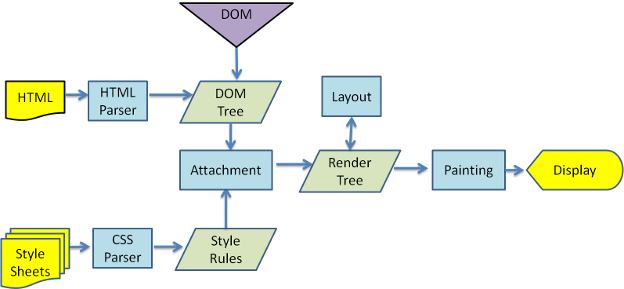

参考：
1. 浏览器是如何工作的 from MDN[中文](https://developer.mozilla.org/zh-CN/docs/Web/Performance/How_browsers_work) &nbsp; [英文](https://developer.mozilla.org/en-US/docs/Web/Performance/How_browsers_work)
1. 浏览器是如何工作的（内部原理) [中文](https://www.html5rocks.com/en/tutorials/internals/howbrowserswork/) &nbsp; [英文](https://www.html5rocks.com/en/tutorials/internals/howbrowserswork/)

# 事件循环
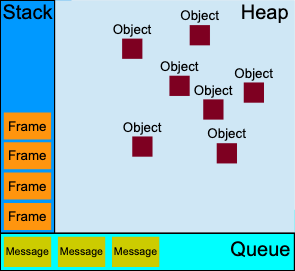

JS的”运行时“（runtime)使用一个消息(message)队列(Queue)
* 每条消息都有一个处理函数，JS处理消息时会自动调用这个处理函数（消息中可能存储该函数的参数）
* 事件循环：runtime 每次从"队头"取出一条消息，”专心“处理该消息直到该消息处理完，然后才处理下一条消息
    ```js
//示意代码，浏览器内部自动执行
    while (queue.waitForMessage()) {
      queue.processNextMessage()
    }
    ```
* 在消息处理过程中，可能会产生新的消息，加入到消息队列的"队尾"（先来后到）

* 浏览器中每一张网页（标签页）中只有一个单线程的主程序，但是还有其它背后看不见的”隐藏线程“，例如网络传输，定时器
* 每个线程都是一行行代码按顺序执行的，多个线程可以看作是”并行“的。（这里按顺序不是指严格的线性，也可能有循环、函数跳转等）
* 这种”按顺序“一步一步执行的方式叫做”同步“，在执行完预定的代码前，不会去执行别的代码。
* 需要特别注意“耗时”的任务，因为这种任务会“阻塞”其它任务（例如网页会卡住，不能处理用户的点击）
* 另一种执行方式是异步，异步不是并行，跟并行没有关系（但是浏览器中的异步往往需要与背后的并行配合）
    ```js
    const request = require(‘request’); // 导入 request 库
    // 发出一个网络请求，并且注册一个处理程序(callback)，
    // 网络请求发出去后，该request函数就执行完了, 不会阻塞在这里
    request('https://www.somepage.com', function (error, response, body) {
      if(error){
        // Handle error.
          console.log("error")
      }
      else {
        // 成功
          console.log("success")
      }
    });
        // 等到从服务器下载好数据后，runtime会去查询注册好的处理程序(callback)，然后生成一个消息放入消息队列，这一步是隐藏的线程执行的， 不会影响主程序线程
    ```


* 这种异步函数的写法不够”人性化“，若是callback（回调）函数里再次使用calback函数，以至于多层callback，并导致 "callback地狱", 程序极难理解，极容易出错
* JS初期只支持这种callback形式的异步，后来逐渐加入了 Promise, async, await 等语法，可以使用“同步的写法”来写异步代码
* JS中的定时器setInteval 以及 Vue3中的nextTick函数都是一个异步操作

# DOM
浏览器会将html文档解析成一棵DOM树，其中每个节点都是用一个Node对象(JS Object)来表示，节点主要有三种类型：
- 文档(Document): 对应于整个文档，是该DOM树的根节点；一个文档中只有一个对象是这个类型（即document)
- 元素(Element): 对应于html中的标签；
- 文本(Text): 对应于html中的内容文本（该文本内部不包含任何标签）;Text节点只能是叶子节点

浏览器会根据这棵DOM树(中的节点信息)来绘制界面视图。由于视图中基本都是元素和文本，而文本比较简单，所以关键在于元素（有时也用“元素”来指代“节点”）

这些节点都是用JS Object来表示，该JS Object中包含了相应节点的信息。可以看作这些JS Object与界面元素具有双向绑定:
- 通过访问（读或写）这些JS Object来查询或修改界面元素
- 用户（网页浏览者）在界面上的输入（例如点击、表单输入等）也可以（通过事件）来修改这些JS Object

<div class="alert alert-block alert-danger">DOM的核心就是用JS Object（数据）来表示节点（视图），两者双向绑定</div>

```html
<html>
  <head>
    <title>Sample Document</title>
  </head>
  <body>
    <h1>An HTML Document</h1>
    <p>This is a <i>simple</i> document.
  </body>
</html>
```
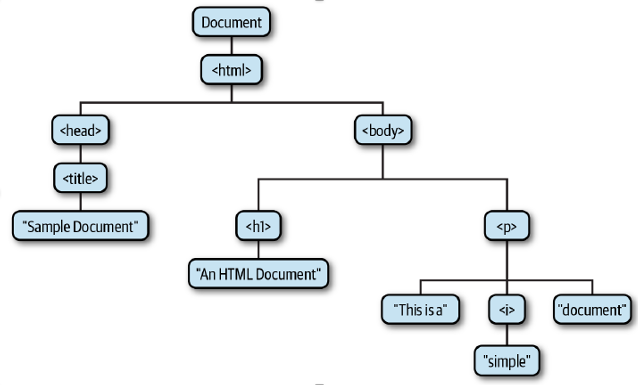

节点Object存储了相应节点的信息：
1. 所有节点都具有的一些属性(property)
    - 表示树中结构关系的属性：childNodes, children, parentNode, firstChild, lastChild, firstElementChild, nextSibling, previousSibling
    - 其它属性：nodeType, tagName, innerHTML
1. 元素节点的某些属性(property)对应相应元素的html属性(attribute)，属性的名称是一一对应的
    - 简单的名称是相同的，例如：id, src, style
    - 多个单词的名称需要转换成骆峰法，例如 tabindex (html) -> tabIndex (JS); 但是事件除外(两者相同），例如 onclick
    - 有些特殊的名称：class -> className
    - 还增加了一些：classList
1. Document节点（只有一个，即document)有一些特殊属性：URL, cookie, all[], images[], forms[]

节点Object除了以上的信息（数据），还有方法（函数），相同类型的节点共享相同的方法，通过类和子类来进行组织：
- Node类表示节点
- 其子类包括Document, Element, Text等
- Element的子类包括更具体的子类：HTMLElement, SVGElement等
- HTMLElement的子类包括：HTMLImageElement, HTMLDivElement等

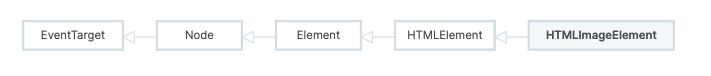

Element的方法主要可以分为：
- 访问元素的html属性: getAttribute, setAttribute, removeAttribute, hasAttribute等
- 操作整个节点：hasChildNodes, removeChild, append, prepend, remove, replaceWith, cloneNode等
- 查找元素：querySelector, querySelectorAll, getElementsByTagName

Document的方法主要有：
- 创建查找元素：createElement, getElementById, getElementsByName, getElementsByTagName, getElementsByClassName
- 操作文档：open, write, close

更具体的元素（例如HTMLTableElement）一般都有自己特有的（数据）属性和方法

# 常见DOM操作
## 查找元素
使用querySelector或querySelectorAll
- `document.querySelector(str)`: 查找document中匹配选择器str的第一个元素
- `ele.querySelector(str)`: 查找元素ele的后代中匹配选择器str的第一个元素
- `document.querySelectorAll(str)`: 查找document中匹配选择器str的所有元素(返回的是一个数组）
- `ele.querySelectorAll(str)`: 查找元素ele的后代中匹配选择器str的所有元素（返回的是一个数组）
举例：

```js
const warnParagraph = document.querySelectorAll('p.warn'); // 查找document中匹配选择器 p.warn 的所有元素
for (let p of warnParagraph){
    let img = p.querySelector('span.big img');
    if (img){
      img.style.width = "1000px";
    }
}
``` 
在已有元素的基础上，可以使用 parantNode, firstChild, lastChild, childNodes等属性来选择”附近“的元素

## DOM节点操作
- 创建新的节点：createElement, createTextNode
- 插入节点：append, prepend, appendChild, prependChild
- 删除节点: remove
- 其它操作：clone, replace

```js
const newDiv = document.createElement('div'); //创建一个元素节点
const newContent = document.createTextNode("Hi there and greetings!"); //创建一个文本节点
newDiv.appendChild(newContent); // 将newContent作为子节点插入到newDiv中

const currentDiv = document.querySelector("#div1"); //选择一个DOM树中的节点
document.body.insertBefore(newDiv, currentDiv); //将newDiv插入到currentDiv的前面
```

```html
<body>
  <div id="elem" about="Elephant"></div>

  <script>
    alert( elem.getAttribute('About') ); // (1) 'Elephant', reading

    elem.setAttribute('Test', 123); // (2), writing

    alert( elem.outerHTML ); // (3), see if the attribute is in HTML (yes)

    for (let attr of elem.attributes) { // (4) list all
      alert( `${attr.name} = ${attr.value}` );
    }
  </script>
</body>
```

## 节点属性操作
每个标准的html属性(attribute)都有一个JS属性(property)对应，直接读写即可（需要注意一下名称的转换）

```html
<body id="test" something="non-standard">
  <script>
    alert(document.body.id); // test
    // non-standard attribute does not yield a property
    alert(document.body.something); // undefined
  </script>
</body>
```
对于非标准的html属性(attribute),则需要用以下方法：
```js
elem.hasAttribute(name);
elem.getAttribute(name);
elem.setAttribute(name, value);
elem.removeAttribute(name);
```
这些方法也可用于标准的html属性(attribute)

```html
<body>
  <div id="elem" about="Elephant"></div>

  <script>
    alert( elem.getAttribute('About') ); // (1) 'Elephant', reading

    elem.setAttribute('Test', 123); // (2), writing

    alert( elem.outerHTML ); // (3), see if the attribute is in HTML (yes)

    for (let attr of elem.attributes) { // (4) list all
      alert( `${attr.name} = ${attr.value}` );
    }
  </script>
</body>
```

需要注意的是，html属性的类型是字符串，DOM属性的类型可以是各种JS数据类型
```html
<div id="div" style="color:red;font-size:120%">Hello</div>

<script>
  // string
  alert(div.getAttribute('style')); // color:red;font-size:120%

  // object
  alert(div.style); // [object CSSStyleDeclaration]
  alert(div.style.color); // red
</script>
```

## css样式操作
可以通过操作`class`或`style`属性来操作css样式;除非必要，尽量用`class`

```html
<div class="...">
<div style="...">
```
与普通属性不同
- class可以通过className和classList来操作
- style可以通过style和cssText来操作

参考：https://javascript.info/styles-and-classes

```html
<body class="main page">
  <script>
    alert(document.body.className); // main page
      
    // add a class
    document.body.classList.add('article'); //还有 remove, toggle 方法

    alert(document.body.className); // main page article
      
    for (let name of document.body.classList) {
      alert(name); 
    }
  </script>
</body>
```

css style属性名称需要转换
```js
// background-color  => elem.style.backgroundColor
// z-index           => elem.style.zIndex
// border-left-width => elem.style.borderLeftWidth

document.body.style.backgroundColor = 'green';

document.body.style.display = "none"; // hide

setTimeout(() => document.body.style.display = "", 1000); // back to normal
```


也可以使用cssText
```html
<div id="div">Button</div>

<script>
  // we can set special style flags like "important" here
  div.style.cssText=`color: red !important;
    background-color: yellow;
    width: 100px;
    text-align: center;
  `;

  alert(div.style.cssText);
</script>
```

# 事件机制
什么是事件（event)？
事件(event)是指系统环境（浏览器）中发生的“行为"、”动作“，例如：
- 鼠标点击了一个超链接
- 鼠标移动到某个按钮上
- 键盘按下了Enter键
- 键盘输入一个字母

事件是用来做什么的？
- 我们想实现的是：在某个事件发生时，浏览器会自动执行某些预先设定的操作。

我们一般说JS语言是基于事件驱动的。

通过注册“事件监听器“（event listener) 来实现，主要包含两个要素：
1. 告诉浏览器，你要监听的是什么样的事件？
1. 告诉浏览器，在所监听的事件发生时，你要执行什么操作？

举例：监听网页上某个button的点击事件，在该事件发生时执行计数器加一

```html
<button onclick="addCounter(1)">counter</button>
```
浏览器解析文档的过程中，可能会“注册”很多各种各样的事件监听器，浏览器会用一个“注册表”来记录这些“事件监听器”，该表中每一项代表一个“事件监听器”

事件的工作机制：事件是怎么产生的？事件是如何接收的？如何描述一个事件？事件是如何处理的？事件监听是如何注册的？

## 事件的产生
事件可以由以下行为触发：
- 用户的操作：鼠标、键盘
- 浏览器的内部行为：浏览器在加载网页文档的时候会触发某些事件
    - 例如文档加载完毕时，会触发DOMContentLoaded事件（浏览器自动触发的，可以类比钩子函数）
- 文档中的代码：可以手动在JS中产生自定义事件（emit）

## 事件的传递与接收
某个事件触发后，浏览器会去查询“事件监听器注册表”。若其中有“匹配”的事件监听器，浏览器会生成一条对应的“消息”，加入到消息队列中；该消息包含
- 相应事件的信息，用一个JS对象(object)来表示，即event
- 事件处理器，用于记录“如何处理该事件”

通俗地说，注册表中的”事件监听器”接收浏览器产生的事件，通过浏览器（runtime）来传递：接收到事件后，生成一条“消息”，放入消息队列，等待runtime执行。

<div class="alert alert-block alert-danger">思考: 事件匹配只需要匹配事件的类型和目标（见下面），但是界面上的元素是以内联的方式存在的，若是某个事件发生在子元素上，那么该事件有发生在它的父元素上吗？</div>
例如：

```html
<button onclick="showBigImage()"><img src="paojie.jpg"/></button>
```
单击button上的img, 会产生一个onclick事件，该事件会匹配上事件注册表中对应于button的事件监听器吗？
- 触发事件的target是一个img, 而事件监听器的target是一个button

## 事件的描述
浏览器使用JS对象来描述一个事件，该object记录以下信息：
- 事件的类型(type)：例如鼠标移动、鼠标单击、鼠标右击、按键按下、按键松开等
- 事件触发所在的目标(target)：事件发生所在的html元素（标签），例如发生在某个button上，或者发生在某个img上
- 其它特定的信息：例如鼠标单击位置的坐标、按键的名称等

- 注册“事件监听器”时，需要提供事件的type和target; 事件触发时，产生的事件object包含事件的所有信息。
- event对象是事件动作的快照，大多数event对象的属性是只读的

## 事件的处理
浏览器的runtime从消息队列中取出一条消息, 根据该消息的内容(一个事件对象`event`, 一个消息处理器`handler`）来处理该消息

可以简单地看作：runtime调用函数 `handler(event)`

有些事件还会执行一些默认的操作，不需要程序员写在handler中
- 例如，单击一个超链接，除了执行注册的事件处理器外，还会执行跳转到相应的href地址
- 若想取消这种默认的操作，调用 `event.preventDefault()`

## 事件监听器的注册
以上所述的概念稍显复杂，但程序员实现时只需要注册一个“事件监听器”，需提供：
- 事件触发所在的目标(target)
- 事件的类型(type)
- 事件处理器(handler)

可以在html的标签上注册，使用html元素的属性（attribute)：
- 属性名称是一个以'on'开头的字符串，后面接的是表示事件类型的字符串
- 属性值是一个字符串，字符串的内容是JS语句

```html
<button onclick="addCounter(1)">counter</button>
```
这种事件处理器可以称为”内联处理器“, 需要“手动”调用函数，若想访问事件对象，可以使用`event`变量；若想访问目标(target)元素，可以使用`this`变量

也可以在js程序中注册

```js
el.onclick = handler; // 这里onclick 也可以是 onmouseover, onkeydown等事件类型
el.addEventListener(eventType, handler);
```
其中:
- el是一个html元素
- eventType是一个表示事件类型的字符串
- handler是一个事件处理函数
例如：
```js
const btn = document.querySelector('button');
btn.onclick = function (){
    addCounter(1);
}
btn.addEventListener('click', ()=>{addCounter(1);})
```
- 这两种事件处理器可以称为"函数处理器" (与Vue中的"方法处理器"是一个意思）
- addEventListener更加强大，可以给同一事件（例如'click') 注册多个事件处理器，也可以取消事件监听

该事件处理函数会自动接收"事件对象object"作为它的<mark>唯一</mark>参数

以上例子没有使用该参数，所以没有写出来，等价于以下代码

```js
const button = document.querySelector('button');
button.addEventListener('click', (event)=>{addCounter(1);})
```
事件处理函数较为复杂时，最好是先在其它地方定义

```js
const button = document.querySelector('button');
function buttonClicked(event){
    window.alert(event.type + " occur at " + event.target.tag); // "click occur at button"
    addCounter(1)
}
button.addEventListener('click', buttonClicked)
```

## 事件冒泡(bubbling和捕获(capture)

```html
<body>
  <div id="container">
    <button>Click me!</button>
  </div>
  <pre id="output"></pre>
</body>
```

```js
const output = document.querySelector('#output');
function handleClick(e) {
  output.textContent += `You clicked on a ${e.currentTarget.tagName} element\n`;
}

const container = document.querySelector('#container');
const button = document.querySelector('button');

document.body.addEventListener('click', handleClick);
container.addEventListener('click', handleClick);
button.addEventListener('click', handleClick);
```

单击按钮button时，这三个元素(body, container, button)都会触发该单击事件

也就是说，对应的三个事件监听器都会匹配上该单击事件，浏览器会生成三个消息

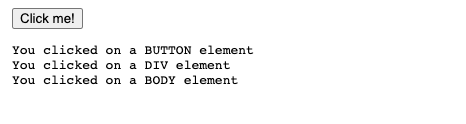

这是浏览器的“事件冒泡”(顺序是由里向外)：事件先触发在最里面的元素上，然后是它的父元素，然后再往外

这样的好处是可以实现"事件代理(delegation)": 例如一个容器div中有很多子元素button, 若想实现"单击任意一个button,都执行差不多的操作", 可以只在div上注册一次，不需要在所有的button上注册。

这样有时会有问题：例如有的时候只想让事件在最里面的元素上触发，不想让它冒泡到外面的元素
- 在某个元素上的事件处理器中调用 `event.stopPropagation()` 来停止下一步传播

现代浏览器在事件触发时会按顺序执行三个阶段：
- 捕获：从最外层的元素(即html元素)开始，从外到里访问“目标”元素的所有祖先元素，直到“目标”元素的父元素；对于每个访问的元素，都会去查询“事件监听器注册表”, 来判断是否在该元素上触发这个事件
- 目标：对于事件发生所在的“真正的”元素，去查询“事件注册表”
- 冒泡：从目标元素的父元素开始，从里到外访问“目标”元素的所有祖先元素；对于每个访问的元素，都会去查询“事件注册表”

以一张网页文档中，某个`td`元素上的事件为例：

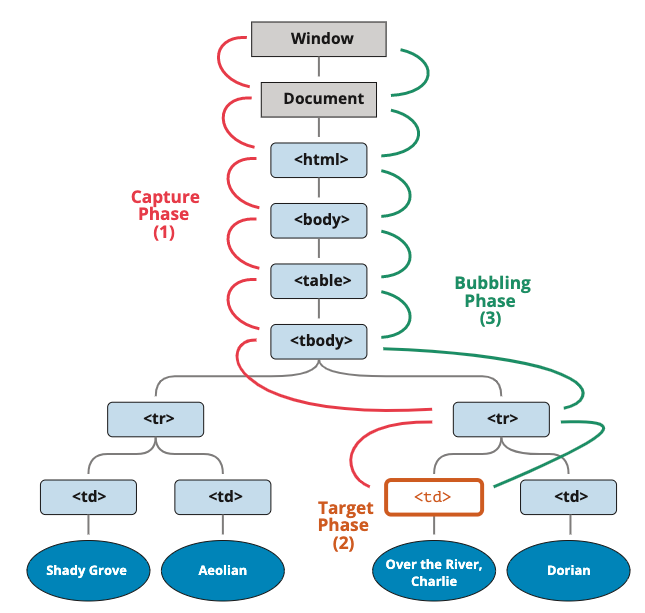

默认情况下，注册的事件监听器只有"目标"和"冒泡"两个阶段，若是想执行全部的三个阶段，需要在注册事件监听器时将capture的值设为`true`

```js
elem.addEventListener(..., {capture: true})
// 或者，只用一个true
elem.addEventListener(..., true)
```

参考：[Bubbling and Capturing](https://javascript.info/bubbling-and-capturing)